In [11]:
import pandas as pd
import matplotlib.pyplot as plt

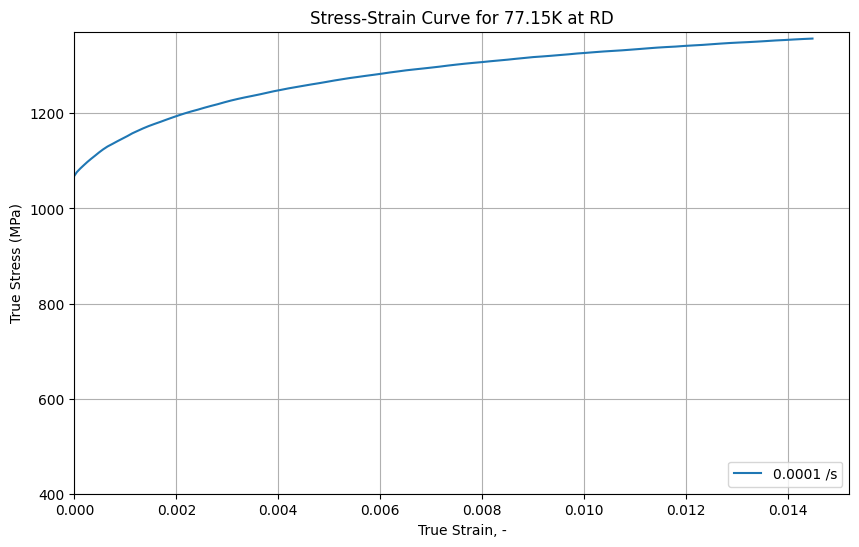

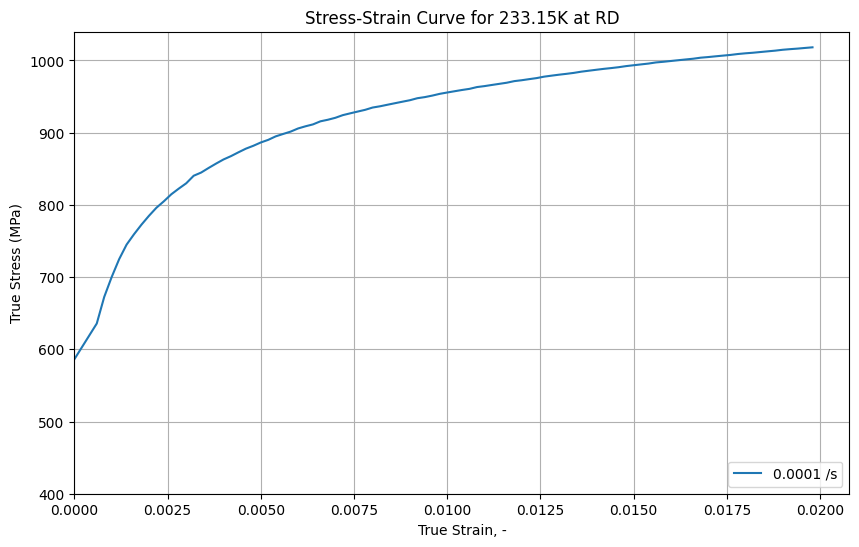

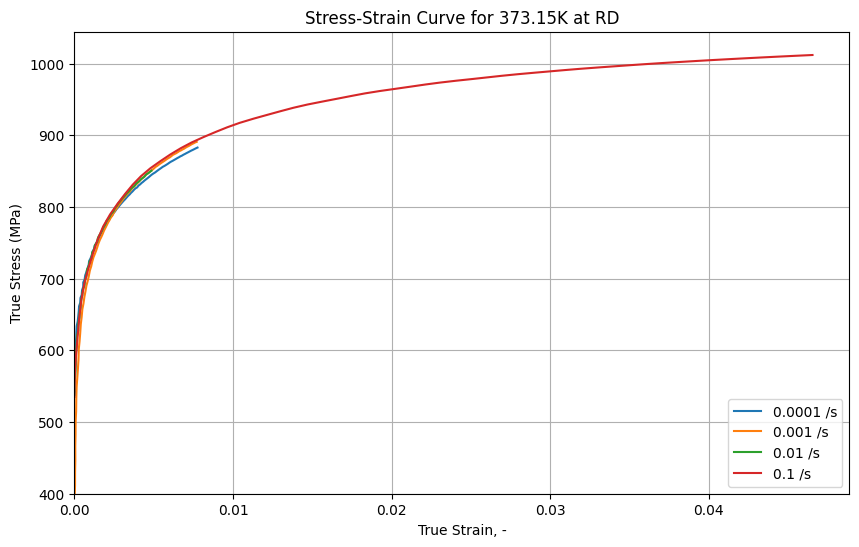

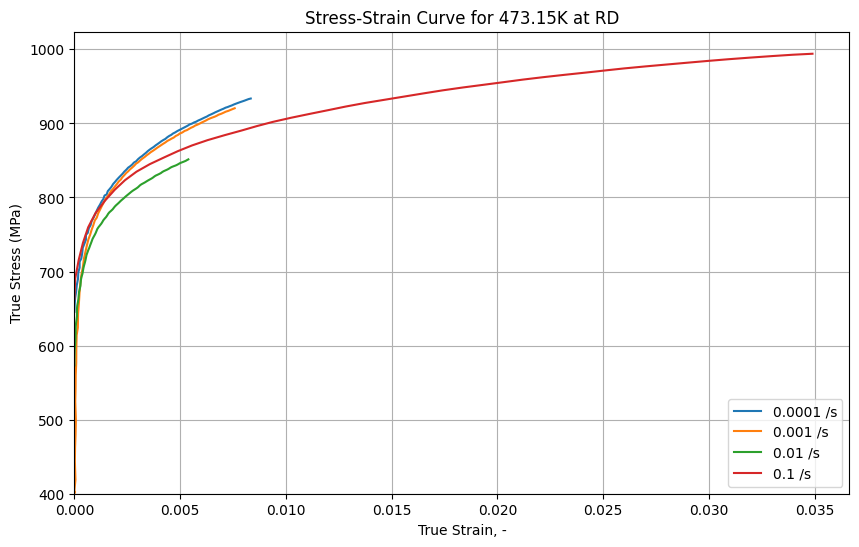

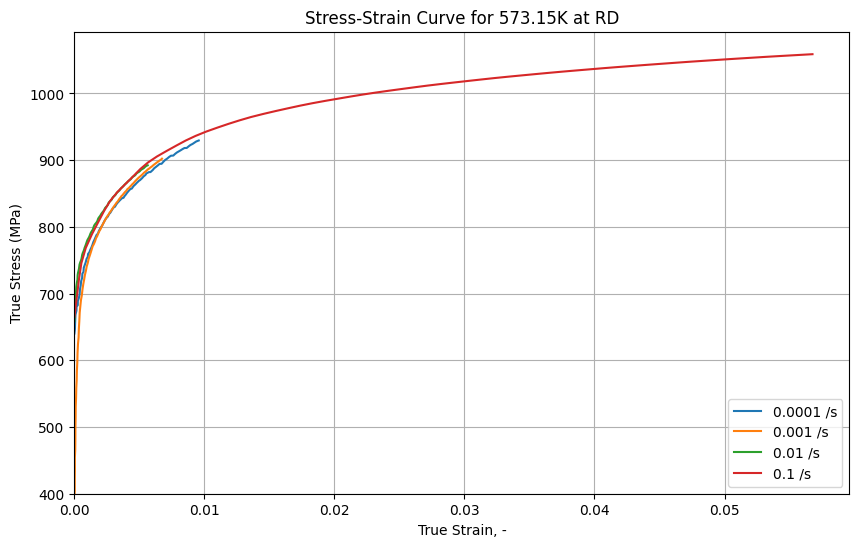

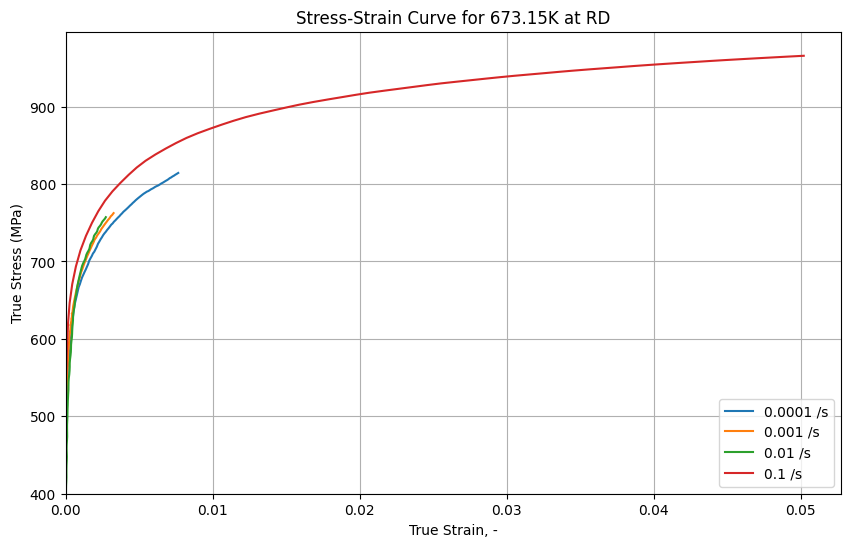

In [12]:
file_path = './Exp_FC_StrRtDpn_TmpDpn.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# Function to plot stress-strain curves as scatter plots
def plot_stress_strain(sheet_data, title, intervals=None):
    plt.figure(figsize=(10, 6))
    for column in sheet_data.columns:
        if '_E' in column:
            stress_column = column.replace('_E', '_S')
            strain_data = sheet_data[column]
            stress_data = sheet_data[stress_column]
            
            if intervals:
                strain_data = strain_data[intervals]
                stress_data = stress_data[intervals]

            strain_rate = column.split('_')[1].replace('StrRt', '')  
            plt.plot(strain_data, stress_data, label=f"{strain_rate} /s")

    temp, orientation = title.split('_')
    temp = temp.replace('Tmp', '')

    plt.title(f'Stress-Strain Curve for {temp} at {orientation}')
    plt.xlabel('True Strain, -')
    plt.ylabel('True Stress (MPa)')
    plt.xlim(left=0)
    plt.ylim(bottom=400)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot for each sheet except special case
for sheet_name in sheet_names:
    if sheet_name != 'Tmp298.15K_RD-DD-TD':
        data = pd.read_excel(xls, sheet_name=sheet_name)
        plot_stress_strain(data, sheet_name, intervals=slice(0, 100))  # Example interval

In [13]:
# Function to plot cases with error bounds as scatter plots
def plot_stress_strain_individual_checked(sheet_data, title, intervals=None):
    plt.figure(figsize=(10, 6))

    conditions = set(col.split('_E')[0] for col in sheet_data.columns if '_E' in col)

    for condition in conditions:
        epsilon = sheet_data[f'{condition}_E']
        sigma = sheet_data[f'{condition}_S']
        
        if intervals:
            epsilon = epsilon[intervals]
            sigma = sigma[intervals]
        
        if f'{condition}_U' in sheet_data and f'{condition}_L' in sheet_data:
            upper_bound = sheet_data[f'{condition}_U']
            lower_bound = sheet_data[f'{condition}_L']
            
            if intervals:
                upper_bound = upper_bound[intervals]
                lower_bound = lower_bound[intervals]
                

            strain_rate = condition.split('_')[1].replace('StrRt', '')
            plt.plot(epsilon, sigma, label=f"{strain_rate} /s")

    temp, orientation = title.split('_')
    temp = temp.replace('Tmp', '')

    plt.title(f'Stress-Strain Curve for {temp} at {orientation}')
    plt.xlabel('True Strain, -')
    plt.ylabel('True Stress (MPa)')
    plt.xlim(left=0)
    plt.ylim(bottom=400)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

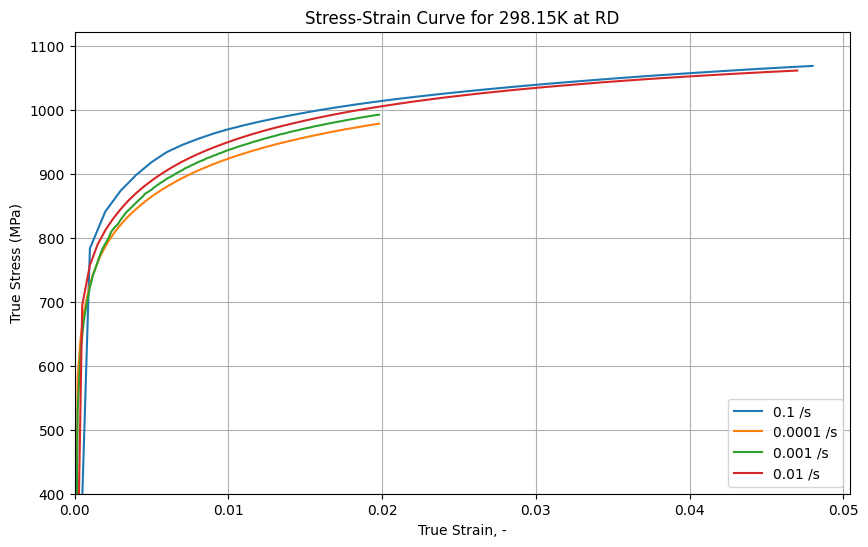

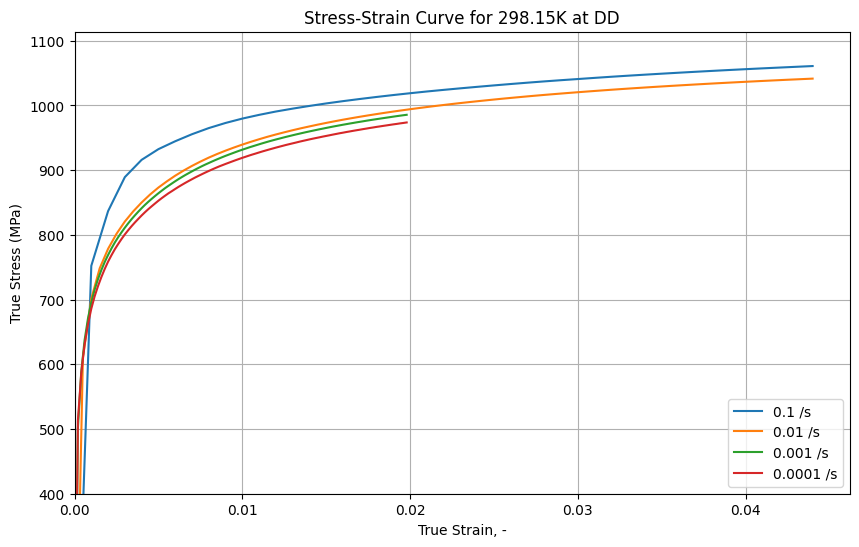

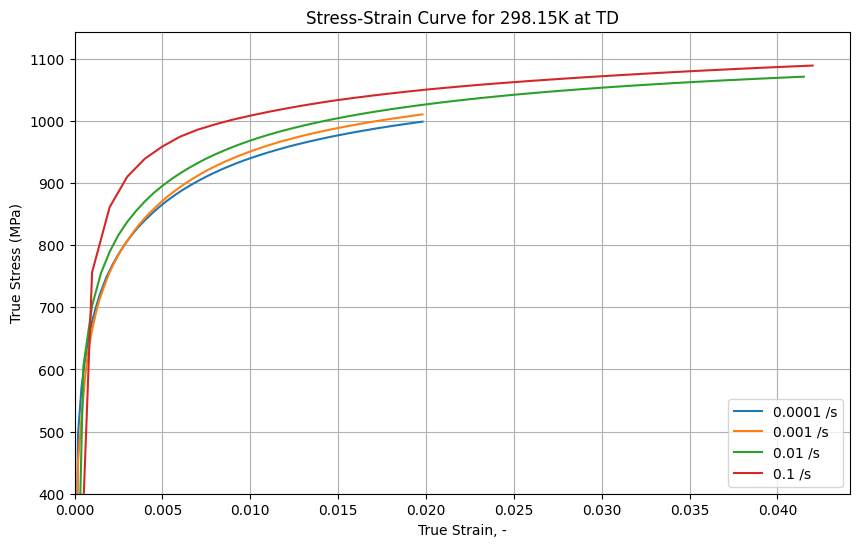

In [14]:
# Special case 1 "Tmp298.15K_RD"
file_path_rd = './Tmp298.15K_RD.xlsx'
data_rd = pd.read_excel(file_path_rd)

# Plot the graph for Tmp298.15K_RD
plot_stress_strain_individual_checked(data_rd, 'Tmp298.15K_RD', intervals=slice(0, 100))  # Example interval

# Special case 2 "Tmp298.15K_DD"
file_path_dd = './Tmp298.15K_DD.xlsx'
data_dd = pd.read_excel(file_path_dd)

# Plot the graph for Tmp298.15K_DD
plot_stress_strain_individual_checked(data_dd, 'Tmp298.15K_DD', intervals=slice(0, 100))  # Example interval

# Special case 3 "Tmp298.15K_TD"
file_path_td = './Tmp298.15K_TD.xlsx'
data_td = pd.read_excel(file_path_td)

# Plot the graph for Tmp298.15K_TD
plot_stress_strain_individual_checked(data_td, 'Tmp298.15K_TD', intervals=slice(0, 100))  # Example interval
